# Graph 2 - Multiple Inputs

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph



In [2]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str
    

In [19]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    
    print(state)  # optional
    state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"
    print(state)  # optional to check
    
    return state


In [20]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)

graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()



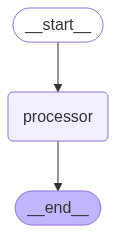

In [21]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
answer = app.invoke({"values": [1,2,3,4], "name":"Prathik"})

# Lnaggraph automatically sets after processing, as you seeing dowm

{'values': [1, 2, 3, 4], 'name': 'Prathik'}
{'values': [1, 2, 3, 4], 'name': 'Prathik', 'result': 'Hi there Prathik! Your sum = 10'}


In [23]:
answer

{'values': [1, 2, 3, 4],
 'name': 'Prathik',
 'result': 'Hi there Prathik! Your sum = 10'}

In [24]:
answer["result"]

'Hi there Prathik! Your sum = 10'

# Exercise for Graph 2
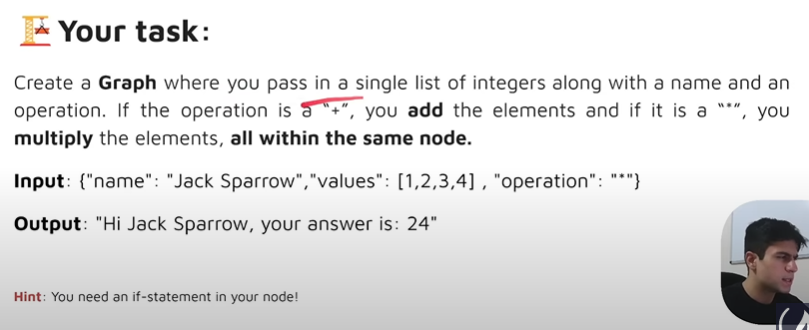

In [34]:
from typing import List, Dict, TypedDict
from langgraph.graph import StateGraph

In [35]:
class AgentExercise2(TypedDict):
    name: str
    values: List[int]
    operation: str
    message: str
    


In [36]:
def process_exercise2(state: AgentExercise2) -> AgentExercise2:
    if state["operation"] == "+":
        result = sum(state["values"])
    elif state["operation"] == "*":
        result = 1
        for num in state["values"]:
            result *= num
    else:
        result = "Invalid Operation"

    state["message"] = f"Hi {state['name']}, your answer is : {result}"
    return state
 

In [39]:
graph = StateGraph(AgentExercise2)
graph.add_node("Process", process_exercise2)
graph.set_entry_point("Process")
graph.set_finish_point("Process")
app = graph.compile()


In [40]:
result = app.invoke({"name":"Jack Sparrow", "values":[1,2,3,4,5], "operation":"*"})

result["message"]

'Hi Jack Sparrow, your answer is : 120'